The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:
***
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz
***

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

## Data Fields

* **Elevation** - Elevation in meters
* **Aspect** - Aspect in degrees azimuth
* **Slope** - Slope in degrees
* **Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway
* **Hillshade_9am** (0 to 255 index) - Hillshade index at 9am, summer solstice
* **Hillshade_Noon** (0 to 255 index) - Hillshade index at noon, summer solstice
* **Hillshade_3pm** (0 to 255 index) - Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points
* **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* **Cover_Type** (7 types, integers 1 to 7) - Forest Cover Type designation

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

pd.set_option('display.max_columns', None)

## Import datasets

In [15]:
Forest_data = pd.read_csv("../data/train.csv") 
print('data set shape:', Forest_data.shape)
Forest_data.head()

data set shape: (15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [32]:
Forest_data[['Elevation', 'Aspect', 'Slope']].describe()

,Elevation,Aspect,Slope
count,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587
std,417.678187,110.085801,8.453927
min,1863.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000
50%,2752.000000,126.000000,15.000000
75%,3104.000000,261.000000,22.000000
max,3849.000000,360.000000,52.000000


In [31]:
Forest_data[['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']].describe()

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000
mean,227.195701,51.076521,1714.023214,1511.147288
std,210.075296,61.239406,1325.066358,1099.936493
min,0.000000,-146.000000,0.000000,0.000000
25%,67.000000,5.000000,764.000000,730.000000
50%,180.000000,32.000000,1316.000000,1256.000000
75%,330.000000,79.000000,2270.000000,1988.250000
max,1343.000000,554.000000,6890.000000,6993.000000


In [33]:
Forest_data[['Hillshade_9am','Hillshade_Noon', 'Hillshade_3pm']].describe()

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
count,15120.000000,15120.000000,15120.000000
mean,212.704299,218.965608,135.091997
std,30.561287,22.801966,45.895189
min,0.000000,99.000000,0.000000
25%,196.000000,207.000000,106.000000
50%,220.000000,223.000000,138.000000
75%,235.000000,235.000000,167.000000
max,254.000000,254.000000,248.000000


In [36]:
Forest_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

* `Soil_Type7` and `Soil_Type15` can be removed as all values are 0

In [42]:
Forest_data.groupby('Cover_Type')['Id'].count()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Id, dtype: int64

### Plot out each class

####  What's the elevation, aspect, slope distribution by each class

Text(0, 0.5, 'Density')

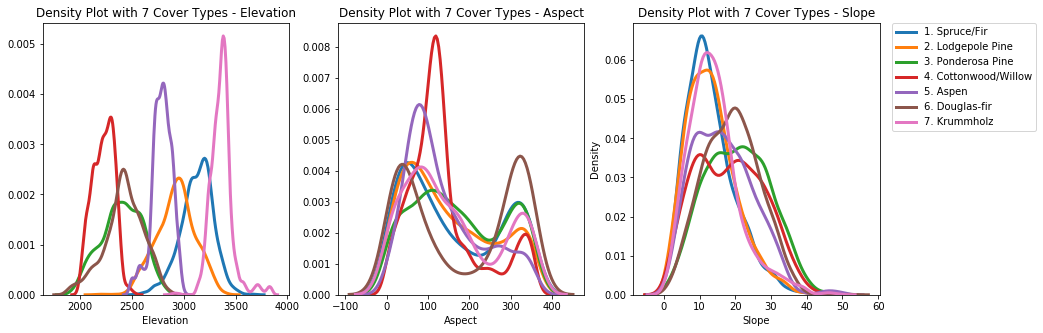

In [96]:
# List of 6 cover types to plot
Cover_Types = ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', 
               '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(15, 5))

# Iterate through the five cover types
for i in range(len(Cover_Types)):
    # Subset to the cover type
    subset = Forest_data[Forest_data['Cover_Type'] == i+1 ]
    
    # Draw the density plot for Elevation
    sns.distplot(subset['Elevation'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax1)
    
    # Draw the density plot for Aspect
    sns.distplot(subset['Aspect'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax2)
    
    # Draw the density plot for Slope
    sns.distplot(subset['Slope'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Cover_Types[i],
                 ax=ax3)

# Plot formatting
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.set_title('Density Plot with 7 Cover Types - Elevation')
ax1.set_xlabel('Elevation')
ax2.set_title('Density Plot with 7 Cover Types - Aspect')
ax2.set_xlabel('Aspect')
ax3.set_title('Density Plot with 7 Cover Types - Slope')
ax3.set_xlabel('Slope')
plt.ylabel('Density')


####  What's the Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways  distribution by each class

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

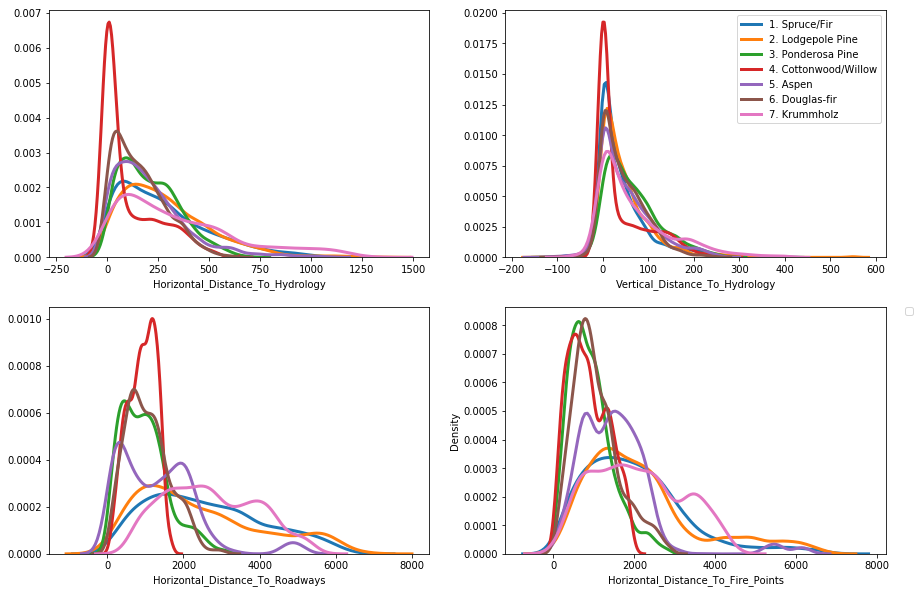

In [105]:
# List of 6 cover types to plot
Cover_Types = ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', 
               '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2,  sharey=False, figsize=(15, 10))

# Iterate through the five cover types
for i in range(len(Cover_Types)):
    # Subset to the cover type
    subset = Forest_data[Forest_data['Cover_Type'] == i+1 ]
    
    # Draw the density plot for Vertical_Distance_To_Hydrology
    sns.distplot(subset['Horizontal_Distance_To_Hydrology'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax1)
    
    # Draw the density plot for Vertical_Distance_To_Hydrology
    sns.distplot(subset['Vertical_Distance_To_Hydrology'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Cover_Types[i],
                 ax=ax2)
    
    # Draw the density plot for Slope
    sns.distplot(subset['Horizontal_Distance_To_Roadways'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax3)
    
    # Draw the density plot for Slope
    sns.distplot(subset['Horizontal_Distance_To_Fire_Points'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax4)

# Plot formatting
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax1.set_title('Density Plot with 7 Cover Types - Horizontal_Distance_To_Hydrology')
ax1.set_xlabel('Horizontal_Distance_To_Hydrology')
# ax2.set_title('Density Plot with 7 Cover Types - Vertical_Distance_To_Hydrology')
ax2.set_xlabel('Vertical_Distance_To_Hydrology')
# ax3.set_title('Density Plot with 7 Cover Types - Horizontal_Distance_To_Roadways')
ax3.set_xlabel('Horizontal_Distance_To_Roadways')
ax4.set_xlabel('Horizontal_Distance_To_Fire_Points')
plt.ylabel('Density')


####  What's the Hillshade_9am, Hillshade_Noon, Hillshade_3pm distribution by each class

Text(0, 0.5, 'Density')

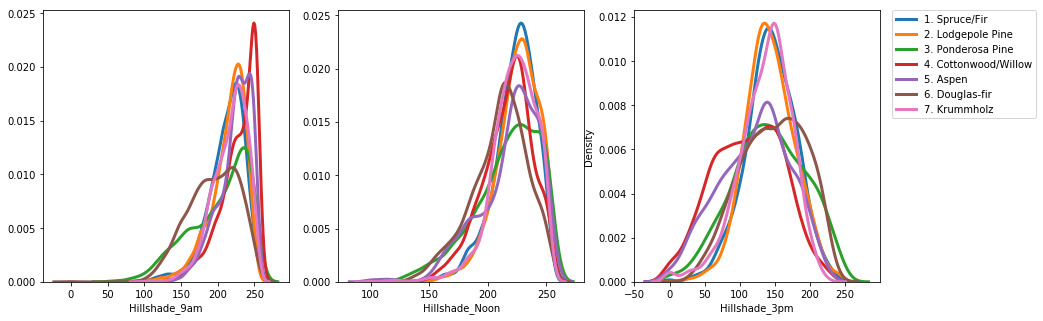

In [107]:
# List of 6 cover types to plot
Cover_Types = ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', 
               '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(15, 5))

# Iterate through the five cover types
for i in range(len(Cover_Types)):
    # Subset to the cover type
    subset = Forest_data[Forest_data['Cover_Type'] == i+1 ]
    
    # Draw the density plot for Hillshade_9am
    sns.distplot(subset['Hillshade_9am'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax1)
    
    # Draw the density plot for Hillshade_Noon
    sns.distplot(subset['Hillshade_Noon'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
#                  label = Cover_Types[i],
                 ax=ax2)
    
    # Draw the density plot for Slope
    sns.distplot(subset['Hillshade_3pm'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Cover_Types[i],
                 ax=ax3)

# Plot formatting
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax1.set_title('Density Plot with 7 Cover Types - Hillshade_9am')
ax1.set_xlabel('Hillshade_9am')
# ax2.set_title('Density Plot with 7 Cover Types - Hillshade_Noon')
ax2.set_xlabel('Hillshade_Noon')
# ax3.set_title('Density Plot with 7 Cover Types - Hillshade_3pm')
ax3.set_xlabel('Hillshade_3pm')
plt.ylabel('Density')


## Baseline Model

In [127]:
Forest_data = pd.read_csv("../data/train.csv") 
Forest_data.pop('Id')
Forest_data.pop('Soil_Type7')
Forest_data.pop('Soil_Type15')
print('data set shape:', Forest_data.shape)

Cover_Types = ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', 
               '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']

# Train, dev, test split (60/20/20)
split1 = int(len(Forest_data)* 0.60)
split2 = int(split1 + (len(Forest_data) - split1) / 2)

train_data, train_labels = Forest_data[:split1].drop(columns=['Cover_Type']), Forest_data.Cover_Type[:split1]
dev_data, dev_labels     = Forest_data[split1:split2].drop(columns=['Cover_Type']), Forest_data.Cover_Type[split1:split2]
test_data, test_labels   = Forest_data[split2:].drop(columns=['Cover_Type']), Forest_data.Cover_Type[split2:]

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         Cover_Types)
print('number of features:',   len(train_data.columns))
print('feature names:\n',   list(train_data.columns))

data set shape: (15120, 53)
training label shape: (9072,)
dev label shape: (3024,)
test label shape: (3024,)
labels names: ['1. Spruce/Fir', '2. Lodgepole Pine', '3. Ponderosa Pine', '4. Cottonwood/Willow', '5. Aspen', '6. Douglas-fir', '7. Krummholz']
number of features: 52
feature names:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'So

### Baseline: KNN

In [130]:
k_values = [1, 3, 5, 7, 9]
for i in k_values:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_data, train_labels)
    test_predicted_labels = model.predict(dev_data)

    # calculate accuracy
    correct, total = 0, 0
    for pred, label in zip(test_predicted_labels, dev_labels):
        if pred == label: correct += 1
        total += 1
    print ('%1d-NN Model Performance: total: %3d  correct: %3d  accuracy: %3.2f' %(i, total, correct, 1.0*correct/total))

    # show precision, recall, and F1 for each label for 1-NN model
    if i == 1:
        print(classification_report(dev_labels, test_predicted_labels))

1-NN Model Performance: total: 3024  correct: 1480  accuracy: 0.49
              precision    recall  f1-score   support

           1       0.37      0.53      0.43       676
           2       0.45      0.57      0.51       562
           3       0.54      0.39      0.46       387
           4       0.18      1.00      0.30        10
           5       0.55      0.88      0.68       221
           6       0.43      0.26      0.32       306
           7       0.79      0.42      0.55       862

   micro avg       0.49      0.49      0.49      3024
   macro avg       0.47      0.58      0.46      3024
weighted avg       0.55      0.49      0.49      3024

3-NN Model Performance: total: 3024  correct: 1486  accuracy: 0.49
5-NN Model Performance: total: 3024  correct: 1484  accuracy: 0.49
7-NN Model Performance: total: 3024  correct: 1486  accuracy: 0.49
9-NN Model Performance: total: 3024  correct: 1476  accuracy: 0.49


### Baseline: Logistic Regression

In [133]:
L2_strengths = [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
for c in L2_strengths:
    model = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
    model.fit(train_data, train_labels)
    test_predicted_labels = model.predict(dev_data)
    print('When C=' + str(c) + ', Logistic Regression Model accuracy: %3.2f f1_score: %3.2f' 
           %(model.score(dev_data, dev_labels), 
             metrics.f1_score(dev_labels, test_predicted_labels, average="weighted")))

When C=0.001, Logistic Regression Model accuracy: 0.53 f1_score: 0.55
When C=0.01, Logistic Regression Model accuracy: 0.59 f1_score: 0.59
When C=0.1, Logistic Regression Model accuracy: 0.63 f1_score: 0.64
When C=0.5, Logistic Regression Model accuracy: 0.62 f1_score: 0.63
When C=1, Logistic Regression Model accuracy: 0.63 f1_score: 0.64
When C=10, Logistic Regression Model accuracy: 0.65 f1_score: 0.66
When C=100, Logistic Regression Model accuracy: 0.61 f1_score: 0.62
When C=1000, Logistic Regression Model accuracy: 0.62 f1_score: 0.63


#### feature selection

In [137]:
# mean of absolute coefficients
print(np.around(abs(model.coef_).mean(axis = 0) ,decimals=2))
# sum of absolute coefficients
print(np.around(abs(model.coef_).sum(axis = 0) ,decimals=1))

[0.01 0.   0.06 0.   0.   0.   0.07 0.05 0.05 0.   1.62 0.   1.24 1.88
 0.77 1.19 1.02 0.69 0.49 0.7  0.03 0.23 0.9  0.45 0.76 0.71 0.37 0.24
 0.76 0.42 0.37 0.84 0.19 0.59 0.74 0.71 0.   0.52 0.   0.15 0.63 0.62
 0.79 0.76 0.87 0.14 0.27 0.08 0.38 1.27 1.18 0.52]
[ 0.   0.   0.4  0.   0.   0.   0.5  0.4  0.4  0.  11.3  0.   8.7 13.2
  5.4  8.3  7.1  4.8  3.4  4.9  0.2  1.6  6.3  3.2  5.3  5.   2.6  1.7
  5.3  3.   2.6  5.9  1.3  4.1  5.2  5.   0.   3.6  0.   1.   4.4  4.3
  5.5  5.3  6.1  1.   1.9  0.5  2.7  8.9  8.2  3.6]


#### Improvement ideas:
1. Remove the coefficients that have both zeros a their mean and sum of absolute coefficients, and retrain the model.
2. Produce a Logistic Regression model using the L1 regularization strength. Reduce the features to only those have at least one non-zero weight among the catogories.